In [1]:
import pandas as pd
import numpy as np

Import File

In [2]:
data = pd.read_csv("/home/shiveshwar/Programs/Telecom/TelcomData.csv",sep=",",index_col=False)

In [3]:
data.head()

,Unnamed: 0,State,VMail.Plan,International.Plan,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Evening.Minutes,Total.Evening.Calls,Total.Evening.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.International.Minutes,Total.International.Calls,Total.International.Charge,Customer.Service.Calls,Number.VMail.Messages,Churn
0,1,OH,Yes,Yes,752.85,83,45.1710,1027.74,99,30.8322,851.61,85,17.0322,900.08,76,270.024,55,88,No
1,2,OK,No,Yes,862.92,84,51.7752,827.74,79,24.8322,932.64,86,18.6528,972.73,93,291.819,47,103,No
2,3,AL,Yes,Yes,468.03,45,28.0818,588.86,57,17.6658,662.87,55,13.2574,513.69,62,154.107,33,64,Yes
3,4,MA,Yes,Yes,743.11,64,44.5866,582.09,46,17.4627,601.45,50,12.0290,699.86,55,209.958,37,60,No
4,5,MO,Yes,No,333.45,29,20.0070,439.42,42,13.1826,366.06,35,7.3212,367.30,34,110.190,22,34,No


In [4]:
telecomdata = data.iloc[:,4:14]

In [5]:
from sklearn import preprocessing

In [6]:
telecomdata_scale = preprocessing.scale(telecomdata)

In [7]:
telecom_df = pd.DataFrame(telecomdata_scale)

In [8]:
telecom_df.head()

,0,1,2,3,4,5,6,7,8,9
0,4.651866,5.039731,4.651866,6.890842,6.301794,6.890842,5.429648,5.162620,5.429648,5.753073
1,5.553468,5.119161,5.553468,5.254667,4.715588,5.254667,6.089982,5.241514,6.089982,6.338132
2,2.318858,2.021389,2.318858,3.300420,2.970762,3.300420,3.891557,2.795783,3.891557,2.641427
3,4.572084,3.530560,4.572084,3.245035,2.098348,3.245035,3.391029,2.401311,3.391029,4.140677
4,1.216491,0.750508,1.216491,2.077870,1.781107,2.077870,1.472775,1.217892,1.472775,1.462531


In [9]:
# k-means cluster analysis for 1-9 clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

clusters=range(1,10)
meandist=[]

In [10]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(telecomdata_scale)
    meandist.append(sum(np.min(cdist(telecom_df, model.cluster_centers_, 'euclidean'), axis=1)) 
    / telecomdata_scale.shape[0])


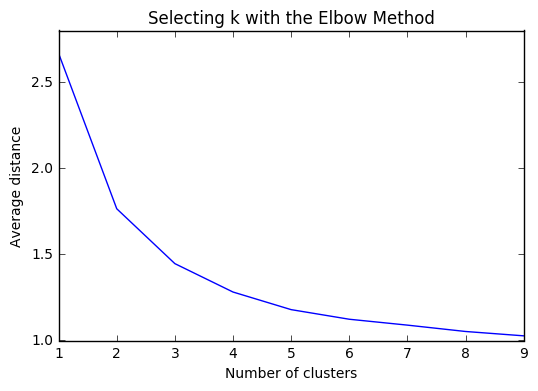

In [11]:
# Plot to decide the number of cluster

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

plt.show()

Here we will decide to form cluster 3 Cluster

In [12]:
# Final Model

model_final = KMeans(n_clusters=3)
model_final.fit(telecom_df)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

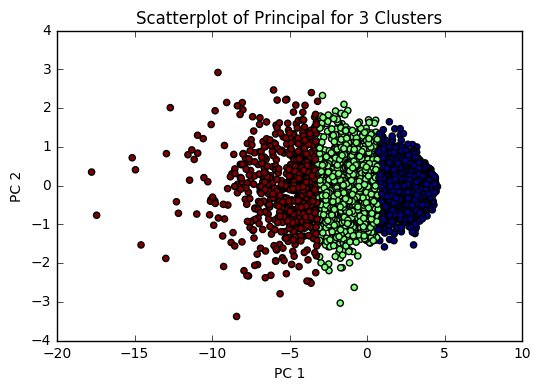

In [13]:
# plot Cluster
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(telecomdata_scale)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model_final.labels_)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scatterplot of Principal for 3 Clusters')
plt.show()


In [14]:
# Assigning the cluster to the dataset
telecomdata['cluster'] = model_final.labels_

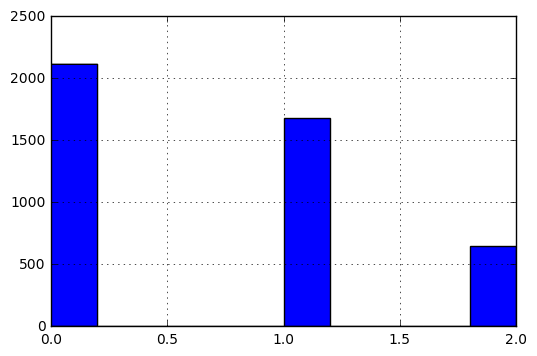

In [15]:
telecomdata['cluster'].hist()
plt.show()

In [16]:
# Cluster Chareteristics
telecomdata.groupby("cluster").mean()

,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Evening.Minutes,Total.Evening.Calls,Total.Evening.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.International.Minutes
cluster,,,,,,,,,,
0,91.927493,9.814570,5.515650,91.984499,9.786660,2.759535,91.762271,9.789026,1.835245,95.112351
1,221.407356,23.387731,13.284441,223.095331,23.470518,6.692860,222.200339,23.435378,4.444007,220.731132
2,393.551402,41.342065,23.613084,392.361217,41.158706,11.770837,394.758428,41.382126,7.895169,390.073852
